In [1]:

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

Text(0.88, 0.25, 'Other = grey')

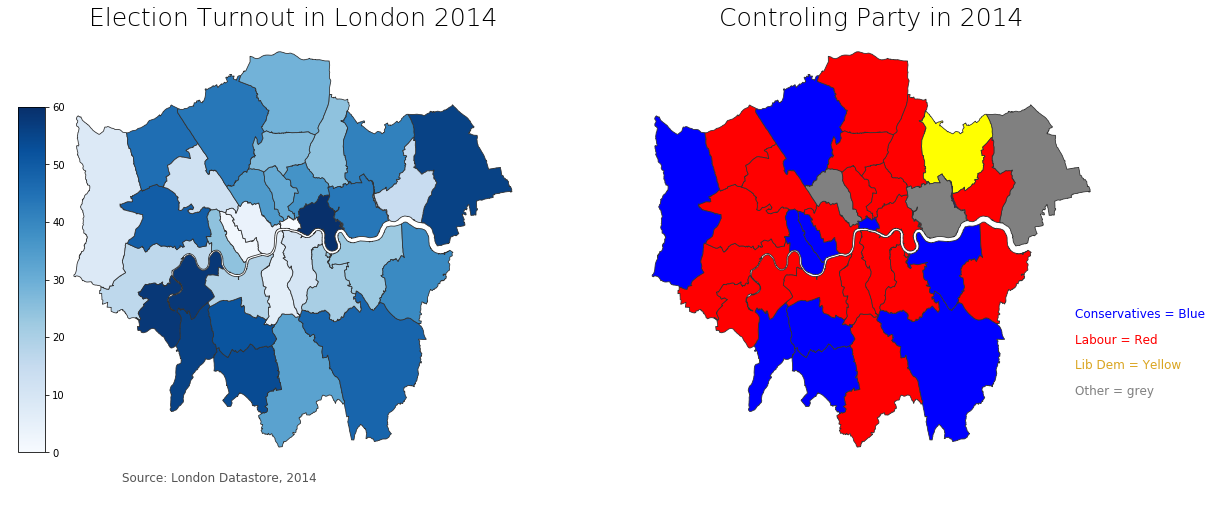

In [6]:
def colour(x):
    if x == "Cons":
        return "blue"
    elif x == "Lab":
        return "red"
    elif x =="Lib Dem":
        return "yellow"
    else:
        return "grey"

    
#Loads the shapefile into geodataframe map_df 
map_df = gpd.read_file(r"C:\Users\na\port\Geopanda MatplobLib\London Map Visual\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp")
map_df = map_df[["NAME","GSS_CODE","geometry"]].set_index("GSS_CODE")


# Loads the csv file into a dataframe df
df = pd.read_csv(r"C:\Users\na\port\Geopanda MatplobLib\London Map Visual\london-borough-profiles.csv", header=0,encoding = "ISO-8859-1")
df = df[["Area_name","Code","Turnout_at_2014_local_elections", "Political_control_in_council"]].set_index("Code")
df = df.rename( columns={"Turnout_at_2014_local_elections": "Turnout", "Political_control_in_council":"Party"})

# Merge data together and apply colour to the different parties
map_df = map_df.join(df)
map_df["colour"] = map_df["Party"].apply(lambda x :colour(x))


fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(19,8))
# Create the first map
col = "Turnout"
map_df.plot(column=col, cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='1.2')
ax1.axis("off")
ax1.set_title('Election Turnout in London 2014', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax1.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=60))
sm._A = []


# add the colorbar to the figure
cbaxes = fig.add_axes([0.1,0.15,0.02,0.6])
cbar = fig.colorbar(sm, cax = cbaxes)

#second map
map_df.plot(column="Party", color=colour_map, linewidth=0.8, ax=ax2, edgecolor='1.2')
ax2.axis("off")
ax2.set_title('Controling Party in 2014', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax2.annotate('Conservatives = Blue',xy=(0.88, 0.4),  xycoords='figure fraction',  verticalalignment='top', fontsize=12, color='blue')
ax2.annotate('Labour = Red',xy=(0.88, 0.35),  xycoords='figure fraction',  verticalalignment='top', fontsize=12, color='red')
ax2.annotate('Lib Dem = Yellow',xy=(0.88, 0.30),  xycoords='figure fraction', verticalalignment='top', fontsize=12, color='goldenrod')
ax2.annotate('Other = grey',xy=(0.88, 0.25),  xycoords='figure fraction',  verticalalignment='top', fontsize=12, color='grey')